<img src='../../images/course_logo_2024.jpg'/>

<div dir="rtl">
    <h1 style="text-align: center;"> תירגול 4 ריגרסיה לוגיסטית (המשך) וספריות גיאוגפריות</h1>
    <h1 style="text-align: center;"> Ex 4 Logistic Regression (continue), Geopandas</h1>
    <p> Based on Matan Mor Exercise and <a hrfe=https://www.coursera.org/specializations/machine-learning-introduction> Andrew NG Machine Learning Course</a></p>
</div>

# Exercise outline
2. Linear/Logistic Regression (refresher)
3. Solving Logistic Regression
4. Scikit learn
5. Tensors
6. Geopandas

# 1. Linear/Logistic Regression (refresher)

<img src="../../images/classificationvsregression.png"/>

# Linear Regression

### General Algorithm
**We want to minimize the Cost function**
1. Choose a linear regression model:$$f_{w,b}(x) = wx + b$$
2. select some arbitrary w, b values [e.g (0,0)] and select a learning rate (alpha)
3. Run number of iterations or untill Cost is minimized
3. 1.  calculate cost function (**cost_function**)
   2.  calculate partial derivates for w and b (**compute_gradient**)
   3.  update w, b with the derivaties multiplied with alpha

**Cost Function**
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 


**gradient descent**:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [1]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 

    #Solve without Matrix and vectors
    # cost = 0
    
    # for i in range(m):
    #     f_wb = w * x[i] + b
    #     cost = cost + (f_wb - y[i])**2
    # total_cost = 1 / (2 * m) * cost
    total_cost = ((x.dot(w) + b - y)**2).sum()/(2*m)

    return total_cost

In [9]:
from itertools import product
import pandas as pd
import numpy as np
from ipywidgets import interact, widgets
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import copy, math
df = pd.DataFrame({'area_sq_feet': [852, 1416, 2104, 1534], 'price_in_thousands' : [178, 232, 460, 315]})

In [10]:
df

,area_sq_feet,price_in_thousands
0,852,178
1,1416,232
2,2104,460
3,1534,315


In [11]:
x_train = df.values[:,0].reshape(-1, 1)
y_train = df.values[:,1].reshape(-1, 1)

In [13]:
w = np.array([[0]])
b = 0

In [14]:
compute_cost(x_train, y_train, w, b)

49541.625

In [15]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]  

    # Solve without matix and vectors
    # dj_dw = 0
    # dj_db = 0
    
    # for i in range(m):  
    #     f_wb = w * x[i] + b 
    #     dj_dw_i = (f_wb - y[i]) * x[i] 
    #     dj_db_i = f_wb - y[i] 
    #     dj_db += dj_db_i
    #     dj_dw += dj_dw_i 
    # dj_dw = dj_dw / m 
    # dj_db = dj_db / m 
    
    f_wb = x.dot(w) + b
    dj_dw = x.T.dot(f_wb - y) / m
    dj_db = (f_wb - y).sum() / m
    
    return dj_dw, dj_db

In [16]:
for i in range(20):
    dj_dw, dj_db =  compute_gradient(x_train,y_train,w,b)
    a = 0.0000001
    w = w -  a*dj_dw
    b = b - a*dj_db
    cost = compute_cost(x_train, y_train, w, b)
    print(f'Iteration {i}: cost {round(cost,1)}')
print(w,b)

Iteration 0: cost 29002.8
Iteration 1: cost 17070.0
Iteration 2: cost 10137.2
Iteration 3: cost 6109.3
Iteration 4: cost 3769.1
Iteration 5: cost 2409.5
Iteration 6: cost 1619.6
Iteration 7: cost 1160.7
Iteration 8: cost 894.0
Iteration 9: cost 739.1
Iteration 10: cost 649.1
Iteration 11: cost 596.8
Iteration 12: cost 566.4
Iteration 13: cost 548.8
Iteration 14: cost 538.5
Iteration 15: cost 532.6
Iteration 16: cost 529.1
Iteration 17: cost 527.1
Iteration 18: cost 525.9
Iteration 19: cost 525.2
[[0.20216258]] 0.0001184229339785026


In [17]:
f_wb = x_train.dot(w) + b

In [18]:
x_train.T.dot(f_wb - y_train)

array([[-8462.79574206]])

# Logistic Regression

<img src='../../images/one_variable_two_variables.png' width=800/>

## One Variable

$g(z) = \frac{1}{1+e^{-z}}\tag{1}$

In [26]:
g = lambda z: 1/(1+np.exp(-z))

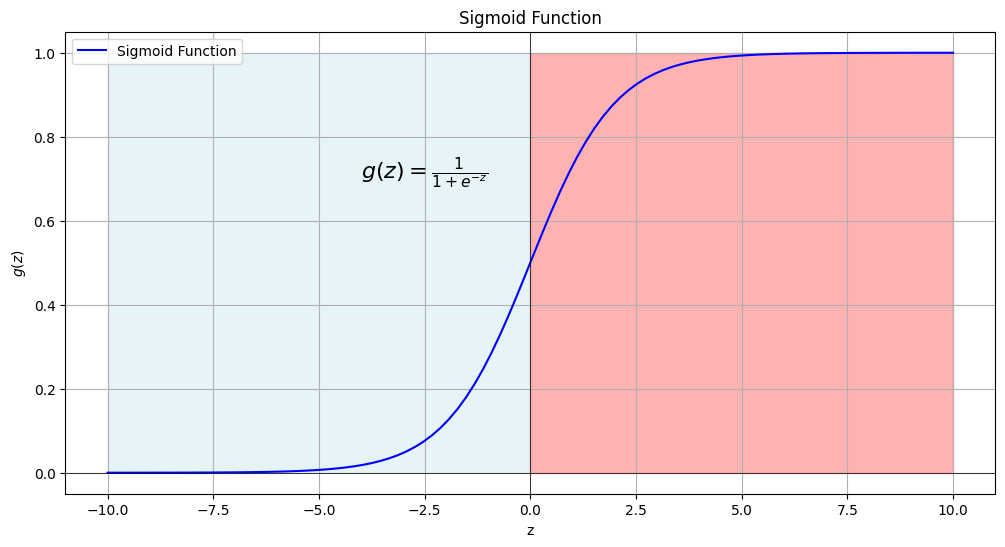

In [27]:


# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Generate x values
x_values = np.linspace(-10, 10, 100)

# Generate y values using the sigmoid function
y_values = g(x_values)

# Draw blue rectangle on the left side
blue_rectangle = plt.Rectangle((0, 0), -10, 1, color='lightblue', alpha=0.3)
ax.add_patch(blue_rectangle)

# Draw orange rectangle on the right side
orange_rectangle = plt.Rectangle((0, 0), 10, 1, color='red', alpha=0.3)
ax.add_patch(orange_rectangle)

# Plot the sigmoid function
plt.plot(x_values, y_values, label='Sigmoid Function', color='blue')

# Include the equation in the plot
plt.text(-2.5, 0.7, r'$g(z) = \frac{1}{1 + e^{-z}}$', fontsize=16, ha='center')

# Set labels and title
plt.xlabel('z')
plt.ylabel(r'$g(z)$')
plt.title('Sigmoid Function')



# Display the plot
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()


$g(z) = \frac{1}{1+e^{-z}}\tag{1}$


A logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{2} $$ 

  where

  $g(z) = \frac{1}{1+e^{-z}}\tag{3}$

  $z = \mathbf{w} \cdot \mathbf{x} + b$

In [28]:
df = pd.DataFrame({ 'x': [0,1,2,3,4,5], 'y': [0, 0 ,0, 1, 1, 1]})

In [29]:
df

,x,y
0,0,0
1,1,0
2,2,0
3,3,1
4,4,1
5,5,1


In [30]:
x_train = df['x'].values
y_train = df['y'].values

In [31]:
x_train = x_train.reshape(-1,1)
print(x_train)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


In [32]:
y_train = y_train.reshape(-1,1)
print(y_train)

[[0]
 [0]
 [0]
 [1]
 [1]
 [1]]


In [33]:
# Decide on a model
w = 0.4
b = 0

In [34]:

@interact(w=(0.0,1,0.01), b=(-10, 10, 0.1))
def h1(w=0, b=0):
    z = lambda x: x*w + b

    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    x_res = np.arange(-10,10,0.05)
    gz = g(z(x_res))
    filter = np.round(gz,1) == 0.5
    x_ = x_res[filter][0]
    try:
        # Draw blue rectangle on the left side
        blue_rectangle = plt.Rectangle((x_, 0), -10, 1, color='lightblue', alpha=0.3)
        ax.add_patch(blue_rectangle)
        
        # Draw orange rectangle on the right side
        orange_rectangle = plt.Rectangle((x_, 0), 10, 1, color='red', alpha=0.3)
        ax.add_patch(orange_rectangle)
    except:
        pass
    
    # Create the scatter plot
    plt.scatter(x_train[y_train == 1], y_train[y_train == 1], marker='x', label='y=1', s = 50)
    plt.scatter(x_train[y_train == 0], y_train[y_train == 0], marker='o', label='y=0', s = 50)
    
    plt.plot(x_res, z(x_res), color='lightblue', linestyle='--', label='Linear Regression')
    plt.plot(x_res, g(z(x_res)), color='darkblue', linestyle='--', label='Logistic Regression')


    # Set labels and title
    plt.xlabel('Z')
    plt.ylabel('X O label')
    plt.title('Logistic Regression classification one variable')
    
    plt.ylim(-0.1,1.1)
    # Show legend
    plt.legend()
    
    # Show the plot
    plt.show()





interactive(children=(FloatSlider(value=0.0, description='w', max=1.0, step=0.01), FloatSlider(value=0.0, desc…

## Two Variables

In [35]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 

In [37]:
X

array([[0.5, 1.5],
       [1. , 1. ],
       [1.5, 0.5],
       [3. , 0.5],
       [2. , 2. ],
       [1. , 2.5]])

In [38]:
y

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1]])

In [40]:
filter_x = [y == 0][0].flatten()

In [41]:
filter_x

array([ True,  True,  True, False, False, False])

In [42]:
X[filter_x, 0]

array([0.5, 1. , 1.5])

In [43]:
# Scatter plot
@interact(x_00=(0.0,6,0.01), x_11=(0.0,6,0.01))
def h2(x_00=2, x_11=1):
    z = lambda x_1,x_2: -3 +x_1 +x_2
    
    filter_x = [y == 0][0].flatten()
    filter_o = [y == 1][0].flatten()
    fig,ax = plt.subplots(1,1,figsize=(8,6))
    plt.scatter(X[filter_x, 0], X[filter_x, 1], marker='x', s=50)
    plt.scatter(X[filter_o, 0], X[filter_o, 1], marker='o', s=50)
    g_ = g(z(x_00,x_11))
    z_ = z(x_00,x_11)
    if g_ > 0.5:
        plt.scatter(x_00, x_11, marker='o', s=100, color='orange')
    else:
        plt.scatter(x_00, x_11, marker='x', s=100, color='blue')
    plt.text(x_00 + 0.1, x_11, f'z = {round(z_,2)}, g={round(g_,2)}', fontsize=16, ha='left')
    x0 = np.arange(0,6, 0.1)
    x1 = 3- x0
    # Fill the region below the line
    ax.fill_between(x0,x1, alpha=0.2)
    
    plt.plot(x0,x1, c="b")
    
    # Set labels and title
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Scatter Plot Two vraiables')
    ax.axis([0, 4, 0, 3.5])
    
    # Show the plot
    plt.show()

interactive(children=(FloatSlider(value=2.0, description='x_00', max=6.0, step=0.01), FloatSlider(value=1.0, d…

### Plotting decision boundary

Now, let's go back to our example to understand how the logistic regression model is making predictions.

* Our logistic regression model has the form

  $f(\mathbf{x}) = g(-3 + x_0+x_1)$


* From what you've learnt above, you can see that this model predicts $y=1$ if $-3 + x_0+x_1 >= 0$

Let's see what this looks like graphically. We'll start by plotting $-3 + x_0+x_1 = 0$, which is equivalent to $x_1 = 3 - x_0$.

## General Algorithem for solivng Logistic Regression

1. Get to know your data and define a model:
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$
  

2. Define Loss function and cost funciton:

The loss function above can be rewritten to be easier to implement.
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$


This is a rather formidable-looking equation. It is less daunting when you consider $y^{(i)}$ can have only two values, 0 and 1. One can then consider the equation in two pieces:  
when $ y^{(i)} = 0$, the left-hand term is eliminated:
$$
\begin{align}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 0) &= (-(0) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 0\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \\
&= -\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$
and when $ y^{(i)} = 1$, the right-hand term is eliminated:
$$
\begin{align}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 1) &=  (-(1) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 1\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\\
  &=  -\log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$

3. Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$



4. Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$


In a previous lab, you developed the *logistic loss* function. Recall, loss is defined to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.






## Ex assume we do not know the parameters:

Model equaition that we are looking for:

* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w_1} \cdot \mathbf{x_1} + \mathbf{w_2} \cdot \mathbf{x_2} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    

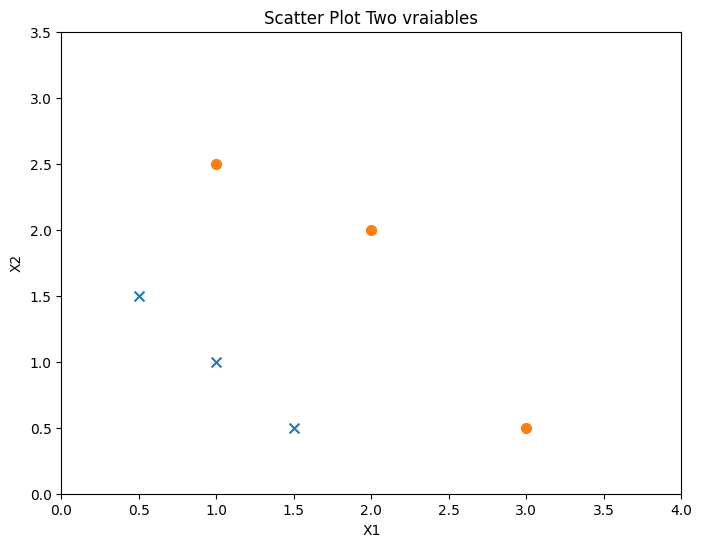

In [158]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
filter_x = [y == 0][0].flatten()
filter_o = [y == 1][0].flatten()
plt.scatter(X[filter_x, 0], X[filter_x, 1], marker='x', s=50)
plt.scatter(X[filter_o, 0], X[filter_o, 1], marker='o', s=50)


# Set labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot Two vraiables')
ax.axis([0, 4, 0, 3.5])

# Show the plot
plt.show()

In [54]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = g(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost


In [55]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = g(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  

In [56]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing


In [57]:
X_tmp = X.copy()
y_tmp = y.copy()
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: [0.49861807]
dj_dw: [0.498333393278696, 0.49883942983996693]


/var/folders/pl/dfcs60nn16qdw7bltcc09p3h0000gn/T/ipykernel_26547/3633580742.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar


In [58]:
w_tmp  = np.zeros_like(X[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X, y, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

/var/folders/pl/dfcs60nn16qdw7bltcc09p3h0000gn/T/ipykernel_26547/3633580742.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar


Iteration    0: Cost [0.68461047]   
Iteration 1000: Cost [0.15909777]   
Iteration 2000: Cost [0.08460064]   
Iteration 3000: Cost [0.05705327]   
Iteration 4000: Cost [0.04290759]   
Iteration 5000: Cost [0.03433848]   
Iteration 6000: Cost [0.0286038]   
Iteration 7000: Cost [0.02450157]   
Iteration 8000: Cost [0.0214237]   
Iteration 9000: Cost [0.01903014]   

updated parameters: w:[5.28123029 5.07815608], b:[-14.22240998]


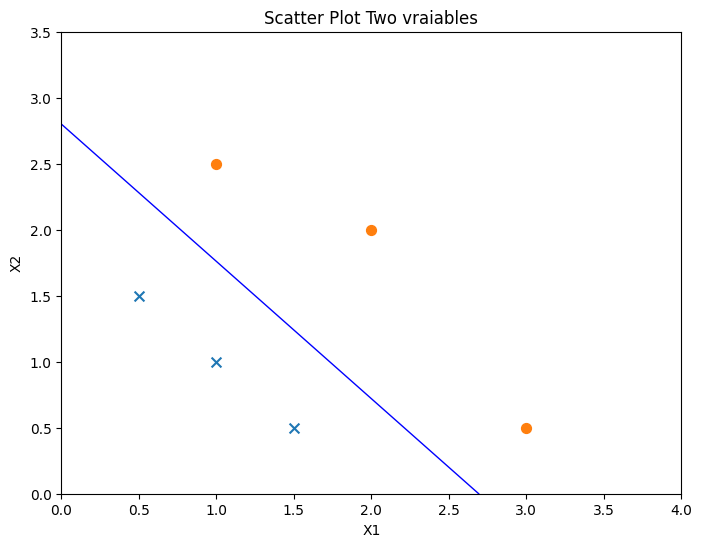

In [60]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
filter_x = [y == 0][0].flatten()
filter_o = [y == 1][0].flatten()
plt.scatter(X[filter_x, 0], X[filter_x, 1], marker='x', s=50)
plt.scatter(X[filter_o, 0], X[filter_o, 1], marker='o', s=50)

# Plot the decision boundary
x0 = (-b_out/w_out[0])[0]
x1 = (-b_out/w_out[1])[0]

# plt.plot([0,x0],[x1,0], c="b")
plt.plot([0,x0],[x1,0], c="b", lw=1)

# Set labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot Two vraiables')
ax.axis([0, 4, 0, 3.5])

# Show the plot
plt.show()

## Solving with Scikit Learn

In [61]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X, y.flatten())

LogisticRegression()

### Make Predictions

You can see the predictions made by this model by calling the `predict` function.

In [63]:
y_pred = lr_model.predict(X)

print("Prediction on training set:", y_pred)

Prediction on training set: [0 0 0 1 1 1]


### Calculate accuracy
You can calculate this accuracy of this model by calling the score function.

In [64]:
print("Accuracy on training set:", lr_model.score(X, y))

Accuracy on training set: 1.0


In [65]:
lr_model.coef_

array([[0.90411349, 0.73587543]])

In [66]:
lr_model.intercept_

array([-2.33371631])

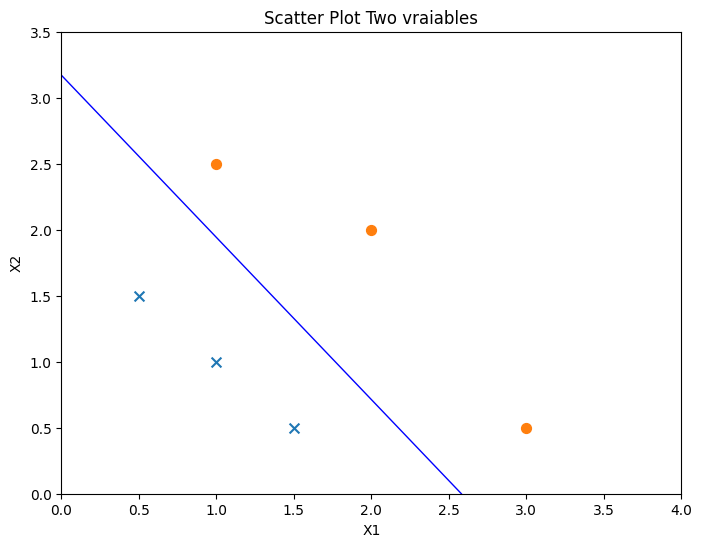

In [200]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
filter_x = [y == 0][0].flatten()
filter_o = [y == 1][0].flatten()
plt.scatter(X[filter_x, 0], X[filter_x, 1], marker='x', s=50)
plt.scatter(X[filter_o, 0], X[filter_o, 1], marker='o', s=50)

# Plot the decision boundary
x0 = (-lr_model.intercept_[0]/lr_model.coef_[0][0])
x1 = (-lr_model.intercept_[0]/lr_model.coef_[0][1])

# plt.plot([0,x0],[x1,0], c="b")
plt.plot([0,x0],[x1,0], c="b", lw=1)

# Set labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot Two vraiables')
ax.axis([0, 4, 0, 3.5])

# Show the plot
plt.show()

# Tensors

In [67]:
import torch
import numpy as np
x = torch.arange(5, dtype=float, requires_grad=True)  # input tensor
w = 2
b = 1

In [68]:
print(x)

tensor([0., 1., 2., 3., 4.], dtype=torch.float64, requires_grad=True)


In [69]:
z1 = x * w + b

In [70]:
z1

tensor([1., 3., 5., 7., 9.], dtype=torch.float64, grad_fn=<AddBackward0>)

$$z1_{x} = x\cdot w + b $$
$$\frac{\partial z1}{\partial x}(x\cdot w + b)  = x$$


In [73]:
z1[2].backward(retain_graph=True)

In [74]:
x.grad

tensor([0., 0., 4., 0., 0.], dtype=torch.float64)

In [75]:
x.grad.zero_()

tensor([0., 0., 0., 0., 0.], dtype=torch.float64)

In [76]:
z2 = z1 ** 2

$$Z2_{x} = (x\cdot w + b)^2 $$
$$\frac{\partial}{\partial x} (xw + b)^2 = 2(xw + b)w$$


In [77]:
z2[2].backward(retain_graph=True)

In [78]:
x.grad

tensor([ 0.,  0., 20.,  0.,  0.], dtype=torch.float64)

In [79]:
z2[1].backward(retain_graph=True)

In [80]:
x.grad

tensor([ 0., 12., 20.,  0.,  0.], dtype=torch.float64)

In [81]:
z2[0].backward(retain_graph=True)

In [82]:
x.grad

tensor([ 4., 12., 20.,  0.,  0.], dtype=torch.float64)

## Back to Machine Learning Nerual Netork intuition with Tensors

Remeber

**Cost Function**
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

**Sigmoid Function**
$g(z) = \frac{1}{1+e^{-z}}\tag{1}$

$z = \mathbf{w} \cdot \mathbf{x} + b$

**What does nerual network do? Intuition**

$x \rightarrow z_1(x) = \mathbf{w_1} \cdot \mathbf{x} + b_1 \rightarrow a_1(z_1) = g(z_1) \rightarrow \frac{1}{1+e^{-z_1}} \rightarrow z_2(a_1) = \mathbf{w_2} \cdot \mathbf{a_1} + b_2 \rightarrow a_2(z_2) = g(z_2) \rightarrow \frac{1}{1+e^{-z_2}} \rightarrow J(w,b) ... \rightarrow $$\frac{\partial J}{\partial w_1}, \frac{\partial J}{\partial w_2} ,  \frac{\partial J}{\partial b_1} ,  \frac{\partial J}{\partial b_2} $



<img src="../../images/simple_nerual_network.svg/">


In [83]:
# Linear regression equation
f = lambda x,w,b: x*b+w

# Sigmoid equation
g = lambda z: 1/(1+np.e**(-z))

# J cost function (Simplified)
j = lambda fx: 1/2 * (fx - y)**2

In [84]:
w = torch.arange(2,4, dtype=float, requires_grad=True)
b = torch.arange(2,4,  dtype=float, requires_grad=True)
x = 2
y = 6.2
print(w)
print(b)

print(f'x = {x}, y = {y}')

tensor([2., 3.], dtype=torch.float64, requires_grad=True)
tensor([2., 3.], dtype=torch.float64, requires_grad=True)
x = 2, y = 6.2


In [85]:
f_1 = f(x, w[0],b[0])
print(f'f1 = {f_1:0.3f}')

z_1 = g(f_1)
print(f'z_1= {z_1:0.3f}')

# ------> next layer
f_2 = f(z_1, w[1], b[1])
print(f'f_2= {f_2:0.3f}')

# ------> cost function
j_1 = j(f_2)
print(f'Cost Function J = {j_1:0.3f}')



f1 = 6.000
z_1= 0.998
f_2= 5.993
Cost Function J = 0.022


In [86]:
j_1

tensor(0.0215, dtype=torch.float64, grad_fn=<MulBackward0>)

In [87]:
# Finding derivatives
j_1.backward(retain_graph=True)

In [88]:
print(w.grad)
print(b.grad)

tensor([-0.0015, -0.2074], dtype=torch.float64)
tensor([-0.0031, -0.2069], dtype=torch.float64)


# Geopandas - Pandas + geometric column
<img src="https://geopandas.org/en/stable/_images/dataframe.svg"/>

In [89]:
import geopandas as gpd
import pandas as pd

In [90]:
gt = pd.read_csv('ground_truth.csv')

In [91]:
gt

,MessageType,Provider,LatitudeDegrees,LongitudeDegrees,AltitudeMeters,SpeedMps,AccuracyMeters,BearingDegrees,UnixTimeMillis,SpeedAccuracyMps,BearingAccuracyDegrees,elapsedRealtimeNanos,VerticalAccuracyMeters
0,Fix,GT,37.428287,-122.072532,-28.204801,0.007480,0.1,242.49963,1595024840441,NaN,NaN,NaN,NaN
1,Fix,GT,37.428287,-122.072532,-28.203800,0.010473,0.1,242.50080,1595024841441,NaN,NaN,NaN,NaN
2,Fix,GT,37.428287,-122.072532,-28.202801,0.020609,0.1,242.50157,1595024842441,NaN,NaN,NaN,NaN
3,Fix,GT,37.428286,-122.072533,-28.202388,0.162880,0.1,242.49815,1595024843441,NaN,NaN,NaN,NaN
4,Fix,GT,37.428284,-122.072538,-28.193974,1.088793,0.1,242.08572,1595024844441,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,Fix,GT,37.524310,-122.352381,140.637192,0.002828,0.1,138.96979,1595026764441,NaN,NaN,NaN,NaN
1925,Fix,GT,37.524310,-122.352381,140.637192,0.002828,0.1,138.96964,1595026765441,NaN,NaN,NaN,NaN
1926,Fix,GT,37.524310,-122.352381,140.637192,0.002481,0.1,138.96935,1595026766441,NaN,NaN,NaN,NaN
1927,Fix,GT,37.524310,-122.352381,140.637196,0.002583,0.1,138.96953,1595026767441,NaN,NaN,NaN,NaN


In [92]:
geometry = gpd.points_from_xy(gt['LongitudeDegrees'], gt['LatitudeDegrees'])

In [93]:
geometry

<GeometryArray>
[<POINT (-122.073 37.428)>, <POINT (-122.073 37.428)>,
 <POINT (-122.073 37.428)>, <POINT (-122.073 37.428)>,
 <POINT (-122.073 37.428)>, <POINT (-122.073 37.428)>,
 <POINT (-122.073 37.428)>, <POINT (-122.073 37.428)>,
 <POINT (-122.073 37.428)>, <POINT (-122.073 37.428)>,
 ...
 <POINT (-122.352 37.524)>, <POINT (-122.352 37.524)>,
 <POINT (-122.352 37.524)>, <POINT (-122.352 37.524)>,
 <POINT (-122.352 37.524)>, <POINT (-122.352 37.524)>,
 <POINT (-122.352 37.524)>, <POINT (-122.352 37.524)>,
 <POINT (-122.352 37.524)>, <POINT (-122.352 37.524)>]
Length: 1929, dtype: geometry

In [94]:
gdf = gpd.GeoDataFrame(gt, crs=4326, geometry = geometry)

<Axes: >

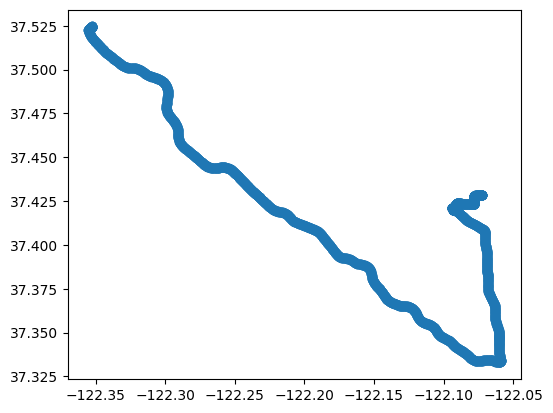

In [95]:
gdf.plot()


In [96]:
gdf.explore()

In [113]:
gdf_3857 = gdf.to_crs(3857)

In [114]:
row = gdf_3857[gdf_3857['UnixTimeMillis'] == 1595025061441]

In [115]:
row['geometry']

221    POINT (-13591292.607 4497933.528)
Name: geometry, dtype: geometry

<Axes: >

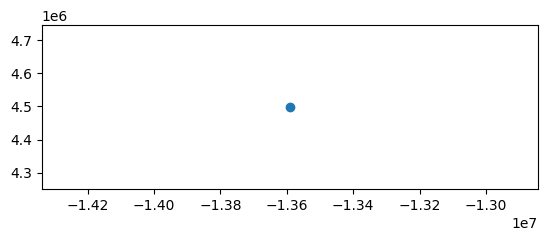

In [116]:
row['geometry'].plot()

In [117]:
p = row['geometry'].values[0]

In [118]:
buffer = p.buffer(250)

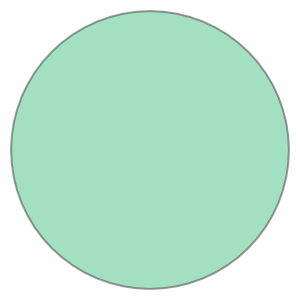

In [119]:
buffer

In [120]:
buffer.bounds

(-13591542.607212892,
 4497683.528291947,
 -13591042.607212892,
 4498183.528291947)

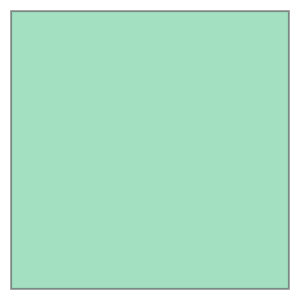

In [121]:
buffer.envelope

In [122]:
envalope = buffer.envelope

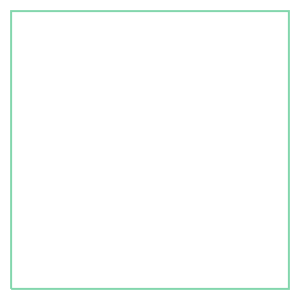

In [123]:
envalope.boundary

In [124]:
len(envalope.boundary.coords)

5

In [125]:
envalope.boundary.coords[0]

(-13591542.607212892, 4497683.528291947)

In [126]:
gdf_3857.intersects(envalope)

0       False
1       False
2       False
3       False
4       False
        ...  
1924    False
1925    False
1926    False
1927    False
1928    False
Length: 1929, dtype: bool

<Axes: >

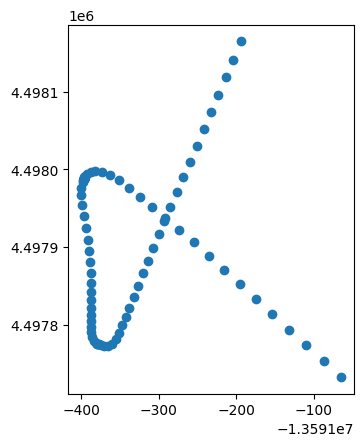

In [127]:
gdf_3857[gdf_3857.intersects(envalope)].plot()

In [129]:
subset = gdf_3857[gdf_3857.intersects(envalope)].copy()

In [130]:
envalope_df = gpd.GeoDataFrame({'no_date':['no_data_yet'], 'geometry' :envalope},crs=3857, geometry='geometry')

In [131]:
m1 = subset.explore(tiles="CartoDB positron")
envalope_df.explore(m=m1, style={'fillOpacity': 0.1, })

In [132]:
subset

,MessageType,Provider,LatitudeDegrees,LongitudeDegrees,AltitudeMeters,SpeedMps,AccuracyMeters,BearingDegrees,UnixTimeMillis,SpeedAccuracyMps,BearingAccuracyDegrees,elapsedRealtimeNanos,VerticalAccuracyMeters,geometry
210,Fix,GT,37.422517,-122.091773,-28.480872,20.204552,0.1,202.60562,1595025050441,NaN,NaN,NaN,NaN,POINT (-13591194.023 4498164.918)
211,Fix,GT,37.422349,-122.091861,-27.624220,19.985737,0.1,202.53195,1595025051441,NaN,NaN,NaN,NaN,POINT (-13591203.763 4498141.482)
212,Fix,GT,37.422185,-122.091948,-26.583439,19.674450,0.1,202.75099,1595025052441,NaN,NaN,NaN,NaN,POINT (-13591213.426 4498118.396)
213,Fix,GT,37.422023,-122.092034,-25.451591,19.323440,0.1,203.08131,1595025053441,NaN,NaN,NaN,NaN,POINT (-13591223.044 4498095.730)
214,Fix,GT,37.421864,-122.092119,-24.245937,18.986794,0.1,203.08263,1595025054441,NaN,NaN,NaN,NaN,POINT (-13591232.539 4498073.528)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,Fix,GT,37.420007,-122.091408,-28.116910,23.177275,0.1,132.27768,1595025146441,NaN,NaN,NaN,NaN,POINT (-13591153.358 4497813.196)
307,Fix,GT,37.419865,-122.091213,-28.012129,23.527313,0.1,132.25725,1595025147441,NaN,NaN,NaN,NaN,POINT (-13591131.650 4497793.320)
308,Fix,GT,37.419722,-122.091015,-27.901083,23.834980,0.1,132.23955,1595025148441,NaN,NaN,NaN,NaN,POINT (-13591109.654 4497773.179)
309,Fix,GT,37.419576,-122.090815,-27.814670,24.170807,0.1,132.13574,1595025149441,NaN,NaN,NaN,NaN,POINT (-13591087.334 4497752.757)


In [133]:
min_value = subset['UnixTimeMillis'].min()
max_value = subset['UnixTimeMillis'].max()
subset['normalized_Time'] = subset['UnixTimeMillis'].apply(lambda p: (p-min_value)*10/(max_value-min_value))

In [134]:
import folium
import copy

In [135]:
m2 = envalope_df.explore(tiles="CartoDB positron", style={'fillOpacity': 0.1})

In [136]:

kw = {"prefix": "fa", "color": "green", "icon": "arrow-up"}
# kw = {}
for i, row in subset.iterrows():
    bearing = int(row['BearingDegrees'])
    folium.Marker(location=[row['LatitudeDegrees'], row['LongitudeDegrees']], icon=folium.Icon(angle=round(bearing,0), **kw),  tooltip=str(row['BearingDegrees'])).add_to(m2)


In [137]:
row['BearingDegrees']

132.31871

In [138]:
m2

In [139]:
m1 = subset.explore(tiles="CartoDB positron", color="red",  style_kwds=dict(
        style_function=lambda x: {"radius": x["properties"]["normalized_Time"]
        },
    ))
envalope_df.explore(m=m1, style={'fillOpacity': 0.1, })


In [140]:
subset

,MessageType,Provider,LatitudeDegrees,LongitudeDegrees,AltitudeMeters,SpeedMps,AccuracyMeters,BearingDegrees,UnixTimeMillis,SpeedAccuracyMps,BearingAccuracyDegrees,elapsedRealtimeNanos,VerticalAccuracyMeters,geometry,normalized_Time
210,Fix,GT,37.422517,-122.091773,-28.480872,20.204552,0.1,202.60562,1595025050441,NaN,NaN,NaN,NaN,POINT (-13591194.023 4498164.918),0.0
211,Fix,GT,37.422349,-122.091861,-27.624220,19.985737,0.1,202.53195,1595025051441,NaN,NaN,NaN,NaN,POINT (-13591203.763 4498141.482),0.1
212,Fix,GT,37.422185,-122.091948,-26.583439,19.674450,0.1,202.75099,1595025052441,NaN,NaN,NaN,NaN,POINT (-13591213.426 4498118.396),0.2
213,Fix,GT,37.422023,-122.092034,-25.451591,19.323440,0.1,203.08131,1595025053441,NaN,NaN,NaN,NaN,POINT (-13591223.044 4498095.730),0.3
214,Fix,GT,37.421864,-122.092119,-24.245937,18.986794,0.1,203.08263,1595025054441,NaN,NaN,NaN,NaN,POINT (-13591232.539 4498073.528),0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,Fix,GT,37.420007,-122.091408,-28.116910,23.177275,0.1,132.27768,1595025146441,NaN,NaN,NaN,NaN,POINT (-13591153.358 4497813.196),9.6
307,Fix,GT,37.419865,-122.091213,-28.012129,23.527313,0.1,132.25725,1595025147441,NaN,NaN,NaN,NaN,POINT (-13591131.650 4497793.320),9.7
308,Fix,GT,37.419722,-122.091015,-27.901083,23.834980,0.1,132.23955,1595025148441,NaN,NaN,NaN,NaN,POINT (-13591109.654 4497773.179),9.8
309,Fix,GT,37.419576,-122.090815,-27.814670,24.170807,0.1,132.13574,1595025149441,NaN,NaN,NaN,NaN,POINT (-13591087.334 4497752.757),9.9


## What else can be done with GeoPandas? - A lot!!
* all Pandas operations (pivot, groupby, aggregte, sort_values, count_values, unique,JOIN, time-series, sampeling, drop_duplicates export to various formats...)
* Loading Various geographic data and exporting data
* Projections
* Simple geographic operations (Difference, Intersect, Inion, Merge, Dissolve, Aggregation)
* Geometric manipulations (Buffer, centroid, translation)
* Spatial joins
* geocdoing
* Generate new geometries (Line graphs)
* Apply spatial indexing to improve performance
* Geopandas + Shapely = Generate new geometries for example graph network


https://geopandas.org/en/stable/gallery/index.html

[Recommended online book](https://geobgu.xyz/py_2022/exercise_solutions_geopandas1.html)


In [141]:
# show nearest lines